<a href="https://colab.research.google.com/github/wasifhasa/Langgraph_Chatbot_With_Tools/blob/main/Langgraph_Chatbot_With_Tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph langsmith langchain langchain_groq langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.0/378.0 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3

In [2]:
from typing import Annotated
from typing_extensions import TypedDict

In [3]:
!pip install arxiv wikipedia

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.1 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=d742c105fb7d9d712354712f1a8e6579ad353040e2e6c85081b530656b05ffc5
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=fe9bce5af485007b3621ce01c8491903ecfd6981e93e3be3a7dc73e17487a10f
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built wikipedia sgmllib3k


In [5]:
## Working With Tools

from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun

## Arxiv And Wikipedia tools
arxiv_wrapper=ArxivAPIWrapper(top_k_results=1,doc_content_chars_max=300)
arxiv_tool=ArxivQueryRun(api_wrapper=arxiv_wrapper)

api_wrapper=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=300)
wiki_tool=WikipediaQueryRun(api_wrapper=api_wrapper)

In [14]:
wiki_tool.invoke("who is Humayun saeed")

"Page: Punjab Nahi Jaungi\nSummary: Punjab Nahi Jaungi (lit.\u2009'I won't go to Punjab'), is a 2017 Pakistani romantic comedy film directed by Nadeem Baig and written by Khalil-ur-Rehman Qamar. It stars Humayun Saeed and Mehwish Hayat alongside Sohail Ahmed, Saba Hameed ,and Urwa Hocane in pivotal roles. "

In [15]:
arxiv_tool.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with "

In [16]:
tools=[wiki_tool]

In [17]:
## Langgraph Application
from langgraph.graph.message import add_messages
class State(TypedDict):
  messages:Annotated[list,add_messages]

In [18]:
from langgraph.graph import StateGraph,START,END

In [19]:
graph_builder= StateGraph(State)


In [20]:
from langchain_groq import ChatGroq

In [21]:
from google.colab import userdata
groq_api_key=userdata.get("groq_api_key")

In [22]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7ddf1ddad4e0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7ddf1ddae1a0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [23]:
llm_with_tools=llm.bind_tools(tools=tools)

In [24]:
def chatbot(state:State):
  return {"messages":[llm_with_tools.invoke(state["messages"])]}

In [25]:
from langgraph.prebuilt import ToolNode,tools_condition

In [26]:
graph_builder.add_node("chatbot",chatbot)
tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START,"chatbot")


In [27]:
graph=graph_builder.compile()

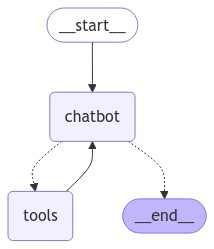

In [28]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [40]:
user_input="Hi there, My name is Wasif"

events=graph.stream(
     {"messages": [("user", user_input)]},stream_mode="values"
)

for event in events:
  event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there, My name is Wasif
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_z4t8)
 Call ID: call_z4t8
  Args:
    query: Wasif
================================= Tool Message =================================
Name: wikipedia

Page: Wasif Ali Wasif
Summary: Malik Muhammad Wasif (15 January 1929 – 18 January 1993), best known through his pen-name Wasif Ali Wasif, was a Pakistani teacher, writer, poet and Sufi figure.
The author of some 40 books, he's known for his aphorisms and short prose pieces and essays, often taken fr
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_c1b2)
 Call ID: call_c1b2
  Args:
    query: Wasif Ali Wasif
================================= Tool Message =================================
Name: wikipedia

Page: Wasif Ali Wasif
Summary: Malik Muhammad Wasif (15 Janu

In [43]:
user_input = "What is Generative Ai?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]},stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is Generative Ai?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_ye6q)
 Call ID: call_ye6q
  Args:
    query: Generative AI
================================= Tool Message =================================
Name: wikipedia

Page: Generative artificial intelligence
Summary: Generative artificial intelligence (generative AI, GenAI, or GAI) is artificial intelligence capable of generating text, images, videos, or other data using generative models, often in response to prompts. Generative AI models learn the patterns and 
================================== Ai Message ==================================

Generative AI is artificial intelligence capable of generating text, images, videos, or other data using generative models, often in response to prompts.  Generative AI models learn the patterns and structures of the data they are trained on an